## 1.	[PyTorch Framework Tutorial] 다음 링크를 직접 수행하고, 결과를 첨부하세요. (20점)

### (1)	코드의 해석/주석과 결과의 의미를 간결하고 간단하게 작성하세요.

https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

## 텐서 (Tensor)

In [1]:
import torch
import numpy as np

### 텐서 초기화하기

- 데이터로부터 직접 생성

지정한 값으로 텐서를 직접 생성

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

- NumPy 배열로부터 생성

array를 입력받아 numpy 배열로부터 텐서를 생성

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

- 다른 텐서로부터 생성

기존의 2행 2열을 1로 채운 텐서 생성  
[0,1) 간격의 균등 분포 내의 임의의 값으로 2행 2열을 채운 텐서 생성

In [4]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4353, 0.3005],
        [0.5016, 0.0867]]) 



무작위(random) 또는 상수(constant) 값을 사용  
2행 3열로 지정후 각각 무작위수, 1, 0으로 채움

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2510, 0.0417, 0.9797],
        [0.1187, 0.2993, 0.2549]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 텐서의 속성(Attribute)

텐서의 크기(size), 데이터타입, 장치확인

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 텐서 연산(Operation)

gpu가 존재한다면 cuda로 텐서를 이동

In [7]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

- NumPy식의 표준 인덱싱과 슬라이싱

4행 4열의 텐서를 1로 채운 뒤에, 1열에 해당하는 값을 0으로 변경

In [8]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- 텐서 합치기 

cat은 열추가의 개념으로 합치고, stack은 행추가의 개념으로 합친다

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [10]:
t1 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


- 텐서 곱하기

텐서의 각 요소별로 곱하기

In [11]:
# 요소별 곱(element-wise product)을 계산합니다
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# 다른 문법:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- 두 텐서 간의 행렬 곱(matrix multiplication)을 계산

텐서 간의 행렬 곱 연산

In [12]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# 다른 문법:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


- 바꿔치기(in-place) 연산

_ 접미사를 갖는 연산들은 바꿔치기(in-place) 연산

변수를 따로 지정하지 않고 내부에서 변환

In [13]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### NumPy 변환(Bridge)

#### 텐서를 NumPy 배열로 변환

텐서를 1로 채운 1행5열 형태를 넘파이로 변환

In [14]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


- 텐서의 변경 사항이 NumPy 배열에 반영 (바꿔치기 연산 이용)

바꿔치기(inplace)연산을 이용해서 각 요소에 1을 더하고, numpy 배열에도 반영

In [15]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy 배열을 텐서로 변환

numpy의 형태의 리스트를 만들고 이를 텐서형태로 변환

In [16]:
n = np.ones(5)
print(f"n: {n}")
t = torch.from_numpy(n)
print(f"t: {t}")

n: [1. 1. 1. 1. 1.]
t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


- NumPy 배열의 변경 사항이 텐서에 반영 (바꿔치기 연산 이용)

numpy 형태의 리스트에 각 1을 더하고 out을 n으로 설정, 텐서에도 반영

In [17]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## TORCH.AUTOGRAD 에 대한 간단한 소개

### PyTorch에서 사용법

resent18 모델  
3채널짜리 높이와 넓이가 64인 이미지 하나를 표현하는 무작위의 데이터 텐서를 생성  
label(정답)은 무작위 값으로 초기화

resnet18모델을 사용하고 무작위의 데이터를 생성, 정답에 해당하는 label을 무작위로 초기화

In [19]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

입력(input) 데이터를 모델의 각 층(layer)에 통과시켜 예측값(prediction)을 생성 : 순전파단계 (forward pass)

resnet18 모델을 이용한 예측값

In [20]:
prediction = model(data) # 순전파 단계(forward pass)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


모델의 예측값과 그에 해당하는 정답(label)을 사용하여 오차(error, 손실(loss) )를 계산  
신경망을 통해 에러를 역전파  
Autograd가 매개변수(parameter)의 .grad 속성(attribute)에, 모델의 각 매개변수에 대한 변화도(gradient)를 계산하고 저장

예측값에서 정답값의 차이의 합으로 loss 계산 후 역전파 진행

In [21]:
loss = (prediction - labels).sum()
loss.backward() # 역전파 단계(backward pass)

옵티마이저(optimizer)를 불러오기  
옵티마이저(optimizer)에 모델의 모든 매개변수를 등록  
학습율(learning rate) 0.1과 모멘텀(momentum) 0.9를 갖는 SGD

optimizer를 통해 최적화 진행

In [22]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

.step 을 호출하여 경사하강법(gradient descent)을 시작  
옵티마이저는 .grad 에 저장된 변화도에 따라 각 매개변수를 조정(adjust)

step을 통해 경사하강법 진행

In [23]:
optim.step() # 경사하강법(gradient descent)

### Autograd에서 미분(differentiation)

requires_grad=True 를 갖는 2개의 텐서(tensor) a 와 b 생성  
equires_grad=True 는 autograd 에 모든 연산(operation)들을 추적해야 한다고 알려줌

In [24]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

 a 와 b 로부터 새로운 텐서 Q 를 생성

Q = 3a^3 −b^2

In [25]:
Q = 3*a**3 - b**2

a 와 b 가 모두 신경망(NN)의 매개변수, Q 가 오차(error)로 가정  
매개변수들에 대한 오차의 변화도(gradient) 구하기

Q 에 대해서 .backward() 를 호출할 때, autograd는 이러한 변화도들을 계산하고 이를 각 텐서의 .grad 속성(attribute)에 저장  
Q 는 벡터(vector)이므로 Q.backward() 에 gradient 인자(argument)를 명시적으로 전달  
gradient 는 Q 와 같은 모양(shape)의 텐서로, Q 자기 자신에 대한 변화도(gradient)를 나타냄

Q.sum().backward() 와 같이 Q 를 스칼라(scalar) 값으로 집계(aggregate)한 뒤 암시적으로 .backward() 를 호출가능

In [26]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

a.grad 와 b.grad 에 변화도 저장 후 값이 올바른지 확인

In [27]:
# 수집된 변화도가 올바른지 확인합니다.
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


#### DAG에서 제외

변화도가 필요하지 않은 텐서들에 대해서는 requres_grad=False 로 설정하여 DAG 변화도 계산에서 제외

입력 텐서 중 단 하나라도 requres_grad=True 를 갖는 경우, 연산의 결과 텐서도 변화도를 가진다.

In [28]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


변화도를 계산하지 않는 매개변수 = 고정된 매개변수(frozen parameter)  
매개변수의 변화도가 필요하지 않다면 신경망 모델의 일부를 고정하는 것이 유용

DAG에서 제외하는 것이 중요한 또 다른 일반적인 사례 미리 학습된 모델을 미세조정 하는 경우

미세조정을 하는 과정에서, 새로운 정답을 예측할 수 있도록 모델의 대부분을 고정후 분류 계층만 변경

resnet18 모델을 불러온 뒤 모든 매개변수를 고정

In [29]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# 신경망의 모든 매개변수를 고정합니다
for param in model.parameters():
    param.requires_grad = False

10개의 정답(label)을 갖는 새로운 데이터셋으로 모델을 미세조정하는 상황을 가정

resnet에서 분류기는 마지막 선형 계층 model.fc  
model.fc를 새로운 선형 계층으로 간단히 대체

In [30]:
model.fc = nn.Linear(512, 10)

model.fc 를 제외한 모델의 모든 매개변수들이 고정  
변화도를 계산하는 유일한 매개변수는 model.fc 의 가중치(weight)와 편향(bias)  
옵티마이저(optimizer)에 모든 매개변수를 등록하더라도, 변화도를 계산(하고 경사하강법으로 갱신)할 수 있는 매개변수들은 분류기의 가중치와 편향뿐

In [31]:
# 분류기만 최적화합니다.
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

### (2)	다음 설명의 주요 함수/API 작성하세요.

- (예시) (torch.empty()) : Returns a tensor filled with uninitialized data.  
1)	(torch.rand()) : Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)  
2)	(torch.zeros()) : Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument size.  
3)	(torch.tensor) : Constructs a tensor with data.  
4)	(torch.from_numpy(x)) : Creates a Tensor from a numpy.ndarray.  
5)	(torch.as_tensor(x)) : Convert the data into a torch.Tensor.  
6)	(torch.cat()) : Concatenates the given sequence of seq tensors in the given dimension.  
7)	(torch.stack()) : Concatenates sequence of tensors along a new dimension.  
8)	(torch.eye()) : Returns a 2-D tensor with ones on the diagonal and zeros elsewhere.  
9)	A tensor can be created with (requires_grad=True) so that torch.autograd records operations on them for automatic differentiation.  
10)	(torch.autograd.backward()) : Computes the sum of gradients of given tensors w.r.t. graph leaves. The graph is differentiated using the chain rule. If any of tensors are non-scalar (i.e. their data has more than one element) and require gradient, then the Jacobian-vector product would be computed, in this case the function additionally requires specifying grad_tensors. It should be a sequence of matching length, that contains the “vector” in the Jacobian-vector product, usually the gradient of the differentiated function w.r.t. corresponding tensors (None is an acceptable value for all tensors that don’t need gradient tensors).
This function accumulates gradients in the leaves - you might need to zero .grad attributes or set them to None before calling it. See Default gradient layouts for details on the memory layout of accumulated gradients.  
11)	(torch.autograd.grad()) : Computes and returns the sum of gradients of outputs w.r.t. the inputs. grad_outputs should be a sequence of length matching output containing the “vector” in Jacobian-vector product, usually the pre-computed gradients w.r.t. each of the outputs. If an output doesn’t require_grad, then the gradient can be None).
If only_inputs is True, the function will only return a list of gradients w.r.t the specified inputs. If it’s False, then gradient w.r.t. all remaining leaves will still be computed, and will be accumulated into their .grad attribute.  
12)	(torch.norm()) : Returns the matrix norm or vector norm of a given tensor.  
13)	(torch.no_grad()) : Context-manager that disabled gradient calculation. Disabling gradient calculation is useful for inference when you are sure that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.
In this mode, the result of every computation will have requires_grad=False, even when the inputs have requires_grad=True. This mode has no effect when using enable_grad context manager. This context manager is thread local; it will not affect computation in other threads.
Also functions as a decorator. (Make sure to instantiate with parenthesis.)  
14)	(torch.detach() : Returns a new Tensor, detached from the current graph. The result will never require gradient


### (3)	다음 주어진 x 값을 토대로 아래의 문제를 수행하세요.

In [32]:
import torch

In [33]:
x = torch.rand(5,4)
x

tensor([[0.6033, 0.9215, 0.0477, 0.0671],
        [0.7483, 0.7156, 0.4959, 0.2097],
        [0.5981, 0.7275, 0.6284, 0.0765],
        [0.5738, 0.8282, 0.5912, 0.7729],
        [0.4795, 0.0464, 0.3138, 0.2354]])

#### 1)	x의 shape을 구하세요.

In [34]:
x.size()

torch.Size([5, 4])

#### 2)	x의 행렬에서 3열을 indexing을 사용해서 출력하세요.

In [35]:
x[:, 2]

tensor([0.0477, 0.4959, 0.6284, 0.5912, 0.3138])

#### 3)	x를 (2, 10)의 크기로 바꾸는 메소드를 사용하여 크기를 변경한 후 출력하세요.

In [36]:
x.reshape(2, 10)

tensor([[0.6033, 0.9215, 0.0477, 0.0671, 0.7483, 0.7156, 0.4959, 0.2097, 0.5981,
         0.7275],
        [0.6284, 0.0765, 0.5738, 0.8282, 0.5912, 0.7729, 0.4795, 0.0464, 0.3138,
         0.2354]])

In [37]:
x.view(2, 10)

tensor([[0.6033, 0.9215, 0.0477, 0.0671, 0.7483, 0.7156, 0.4959, 0.2097, 0.5981,
         0.7275],
        [0.6284, 0.0765, 0.5738, 0.8282, 0.5912, 0.7729, 0.4795, 0.0464, 0.3138,
         0.2354]])

#### 4)	x를 cuda 장치 객체로 변경하세요.

In [38]:
import torch

In [39]:
device = torch.device('cuda')
x.to(device)
x.cuda()

tensor([[0.6033, 0.9215, 0.0477, 0.0671],
        [0.7483, 0.7156, 0.4959, 0.2097],
        [0.5981, 0.7275, 0.6284, 0.0765],
        [0.5738, 0.8282, 0.5912, 0.7729],
        [0.4795, 0.0464, 0.3138, 0.2354]], device='cuda:0')

### (4)	다음 예측값과 실제값이 주어졌을 때, 교차 엔트로피 손실함수를 구하세요.

예측값: 𝑦̂ = [0.57, 0.05, 0.14, 0.10, 0.14], 실제값: 𝑦 = [1, 0, 0, 0, 0]

#### 1)	numpy로 구현하여 계산하세요.

In [40]:
import numpy as np

In [41]:
y_hat = np.array([0.57, 0.05, 0.14, 0.10, 0.14])
y = np.array([1, 0, 0, 0, 0])
delta = 1e-8 # log0을 막기 위함

In [42]:
numpy_loss = -np.sum(y * np.log(y_hat + delta))
print("numpy_loss :", numpy_loss)

numpy_loss : 0.5621189006096817


#### 2)	PyTorch로 구현하여 계산하세요. (hint: torch의 loss 함수 사용)

In [43]:
import torch
import torch.nn as nn

In [44]:
y_hat = torch.tensor([[0.57, 0.05, 0.14, 0.10, 0.14]])
y = torch.tensor([0])

In [45]:
pytorch_loss = torch.nn.functional.nll_loss(torch.log(y_hat), y)

In [46]:
print('pytorch_loss: ', pytorch_loss)

pytorch_loss:  tensor(0.5621)


## 2.	[선형회귀] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (17점) 

In [45]:
# 관련 라이브러리
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### (1) 화면 출력 확인

X = 100개의 랜덤한 수  
y = 3*X+4

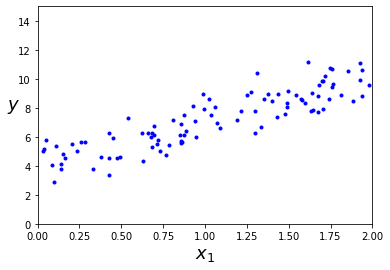

In [46]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) 
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.axis([0, 2, 0, 15])
plt.show()

### (2) theta_best 출력 확인

모든 샘플 데이터를 1로 초기화 한 행 추가  
선형대수 모듈 linag의 inv() 함수를 이용한 역행렬 계산  
dot() 매서드를 이용한 내적  
theta_best는 X_b.T와 X_b의 내적한 것의 역행렬과 X_b.T를 내적한 뒤에 y와 내적한 값

In [47]:
### 정규 방정식을 사용한 선형회귀 접근 ### 

X_b = np.c_[np.ones((100, 1)), X] # 절편항을 위해 1열에 1값 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) # 정규방정식을 이용한 선형 회귀의 최적해 탐색

[[4.00764134]
 [3.0486597 ]]


### (3) y_predict 출력 확인

x가 0, 2일때 theta_best을 이용한 y값 예측  
x= 0일때 3.7516817, x=2일때 9.8636473로 예측

In [48]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # 2행 1열의 행렬에 1로 추가하고 합침
y_predict = X_new_b.dot(theta_best)
print(y_predict) # 최적의 세타 값을 이용한 예측

[[ 4.00764134]
 [10.10496074]]


### (4) 화면 출력 확인

theta_best를 이용한 x에 대한 y의 예측값 그래프  
데이터 분포를 표현한 그래프와 X가 0일 때 값과 2일 때 예측 값을 연결한 회귀선

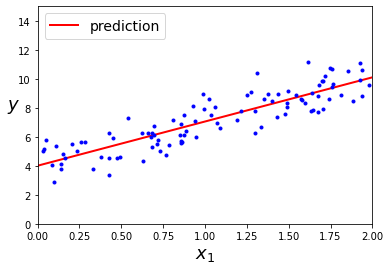

In [49]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### (5) linreg.intercept, linreg.coef 출력 확인

intercept는 편향(절편) 파라미터  
coef는 계수(가중치) 파라미터  
내적을 통해 구한 값과 동일

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("intercept & coefficient:\n",lin_reg.intercept_,lin_reg.coef_)

intercept & coefficient:
 [4.00764134] [[3.0486597]]


### (6) lin_reg.predict(X_new) 출력 확인

predict 함수를 이용한 예측값과 위에서 구한 값 동일

In [51]:
print("predictions:\n", lin_reg.predict(X_new))

predictions:
 [[ 4.00764134]
 [10.10496074]]


### (7) theta_best_svd 출력 확인

최소 자승법을 이용해서 최적의 파라미터 값 탐색  
X의 유사역행렬과 y의 곱을 계산하는 함수  
theta_best_svd=회귀계수, residuals = 잔차의 합, rank = 행렬의 순위, s = 특이값

In [52]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd) # least squares 결과

[[4.00764134]
 [3.0486597 ]]


### (8) np.linalg.pinv(X_b).dot(y) 출력 확인

유사 역행렬을 통해 최적의 파라미터 탐색

In [53]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬을 이용한 세타 근사값 탐색

array([[4.00764134],
       [3.0486597 ]])

### (9) theta 출력 확인

경사하강법을 사용한 선형회귀 접근  
벡터의 노름이 ϵ(허용오차)보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것으로 알고리즘을 중지  
최적의 파라미터를 탐색

θ에서 학습률을 곱한 gradient vector를 빼는 이유 스텝이 전역 최솟값의 좌측에서 시작한 경우 기울기는 음(-)의 값을 가지므로 -와 만나 +가 되어 θ값을 키워 우측으로 이동해야 하기 때문


In [54]:
#경사하강법을 사용한 선형 회귀 접근

eta = 0.1 # learning rate 학습률 설정
n_iterations = 1000   # 반복 횟수 설정
m = 100 # 샘플 수

theta = np.random.randn(2,1) # 무작위 초기값 설정

for iteration in range(n_iterations): # 세타를 갱신하면서 최적의 세타 탐색
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y) # 배치 경사하강법
    theta = theta - eta * gradients   # next step
    
theta

array([[4.00764134],
       [3.0486597 ]])

### (10) X_new_b.dot(theta) 출력 확인

theta로 설정된 파라미터 값으로 계산한 x= 0,2일때 값  
predict 함수를 사용했을 때와 같은 값

In [55]:
X_new_b.dot(theta) # 예측값

array([[ 4.00764134],
       [10.10496074]])

### (11) 화면 출력 확인

learning rate가 너무 작으면 최적해에 수렴하는데 시간이 오래 걸리고, 너무 크게 되면 최적해를 찾기 어렵다.  
learning rate = 0.1일때가 가장 적절한 것으로 판단

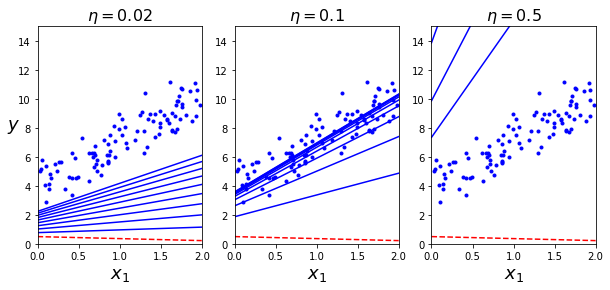

In [56]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None): 
    m = len(X_b)
    plt.plot(X, y, "b.") 
    n_iterations = 1000
    for iteration in range(n_iterations): 
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
        theta = theta - eta * gradients

        if theta_path is not None: 
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18) 
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1) 
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd) 
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

### (12) 화면 출력 확인

학습률을 점점 줄여가면서 파라미터를 조절

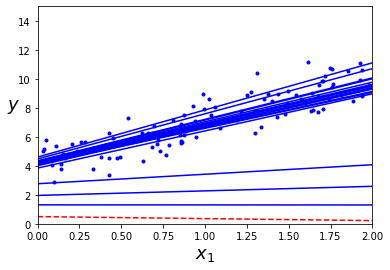

In [57]:
### 스토캐스틱 경사 하강법을 사용한 선형회귀 접근 ### 

theta_path_sgd = []
m = len(X_b) 
np.random.seed(42) 

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t): 
    return t0 / (t + t1)
theta = np.random.randn(2,1) # 무작위 초기값

for epoch in range(n_epochs): # iteration에 따라 최적해에 수렴
    for i in range(m):
        if epoch == 0 and i < 20: 
            y_predict = X_new_b.dot(theta) # SGD를 이용한 y_predict
            style = "b-" if i > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients 
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.") 
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.axis([0, 2, 0, 15])
plt.show()

### (13) theta 출력 확인

스토캐스틱 경사하강법(SGD)을 이용하여 구한 파라미터 값이 최적의 값에 근사한 모습을 보여줌

In [58]:
theta # 모든 epoch 후의 예측값

array([[4.04434251],
       [3.04939076]])

### (14) sgd_reg.fit(X, y.ravel()) 출력 확인

sklearn을 이용한 스토캐스틱 경사하강법(SGD) 학습

In [59]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

### (15) sgd_reg.intercept_, sgd_reg.coef_ 출력 확인

스토캐스칙 경사하강법(SGD) 패키지를 이용해 탐색한 결과 최적값에 근사

In [60]:
print("intercept & coefficient:\n",sgd_reg.intercept_,sgd_reg.coef_)

intercept & coefficient:
 [3.95246926] [2.98829516]


### (16) theta 출력 확인

미니배치 경사 하강법으로 구한 파라미터값이 최적의 값에 근사한 모습을 보여줌

In [61]:
### 미니배치 경사 하강법을 사용한 선형회귀 접근 ### 

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20 

np.random.seed(42)
theta = np.random.randn(2,1) 

t0, t1 = 200, 1000

def learning_schedule(t): 
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) 
    X_b_shuffled = X_b[shuffled_indices] 
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size): 
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size] 
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(t)
        theta = theta - eta * gradients 
        theta_path_mgd.append(theta)
theta

array([[4.03840544],
       [3.09821793]])

### (17) 화면 출력 확인

SGD - 학습이 불안정하지만 최적해에 유사하게 수렴, 많은 시간 소요  
Mini-Batch - SGD보다 안정적으로 최적해에 수렴  
Batch - 가장 안정적으로 최적해에 수렴

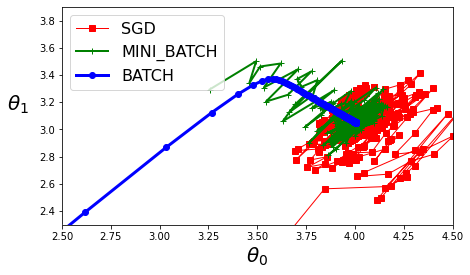

In [62]:
theta_path_bgd = np.array(theta_path_bgd) 
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD") 
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH") 
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH") 
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20) 
plt.ylabel(r"$\theta_1$	", fontsize=20, rotation=0) 
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()


## 3.	[규제] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (3점) (코드의 해석과 결과의 의미를 작성하세요.)

### 화면 출력 확인 및 결과 해석

규제강도(알파)의 변화에 따른 모형비교

알파는 규제 강도를 의미하며, 규제 강도가 약할수록 (알파가 작을수록) 과대적합이 나타나는 것을 확인할 수 있음

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

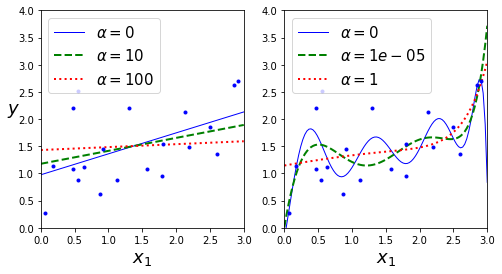

In [64]:
# 관련 라이브러리
from sklearn.linear_model import Ridge

np.random.seed(42) 
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs): 
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() 
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new) 
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha)) 
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15) 
    plt.xlabel("$x_1$", fontsize=18) 
    plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8,4)) 
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42) 
plt.show()


## 4.	[활성함수] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (3점) (코드의 해석과 결과의 의미를 작성하세요.)

### 화면 출력 확인 및 각 활성함수의 특징을 비교 서술

Step(계단함수) : 0을 기준으로 0보다 크면 1, 0보다 작으면 -1이 출력, 미분불가, 연속적인 값 출력불가
Sigmoid(시그모이드) : 0~1 사이의 실수값을 출력함. 미분 가능, 값이 커지거나 작아지면 미분값이 0이 되어 vanishing gradient(경사하강) 문제 발생  
tanh : sigmoid와 유사, 출력 범위가 -1 ~ +1 사이의 실수값, 중간값이 0.  
ReLU : ReLU(x)=max(0,x) 연속적이지만, x=0 에서 미분불가, x<0일 경우에는 0  
실제로 잘 작동하고 계산 속도가 빠르다는 장점이 있어 기본 활성화 함수로 이용  
값이 커져도 gradient vanishing 문제가 발생하지 않음. 0 이하의 값에서는 학습 시 가중치를 죽이는 dying relu라는 문제

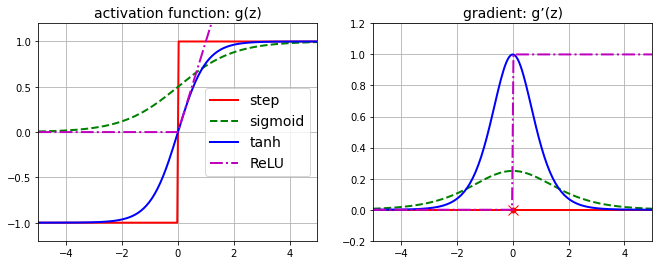

In [65]:
# 파이썬 2, 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 관련 라이브러리
import os
import numpy as np
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200) 

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step") 
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid") 
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh") 
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU") 
plt.grid(True)
plt.legend(loc="center right", fontsize=14) 
plt.title("activation function: g(z)", fontsize=14) 
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step ")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid") 
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh") 
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU") 
plt.grid(True)
plt.title("gradient: g’(z)", fontsize=14) 
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [66]:
from PIL import Image

## 5. [probability] 직원이 A제조사로부터 1000개의 직접회로 (IC)를, B제조사로부터 2000개의 IC를, C 제조사로부터 3000개의 IC를 구매했다. IC의 불량 검사 결과, A사로부터 구매한 IC의 불량 확률은 0.05, B사로부터 구매한 IC의 불량 확률은 0.10, C사로부터 구매한 IC의 불량 확률은 0.10이었다. (4 점)

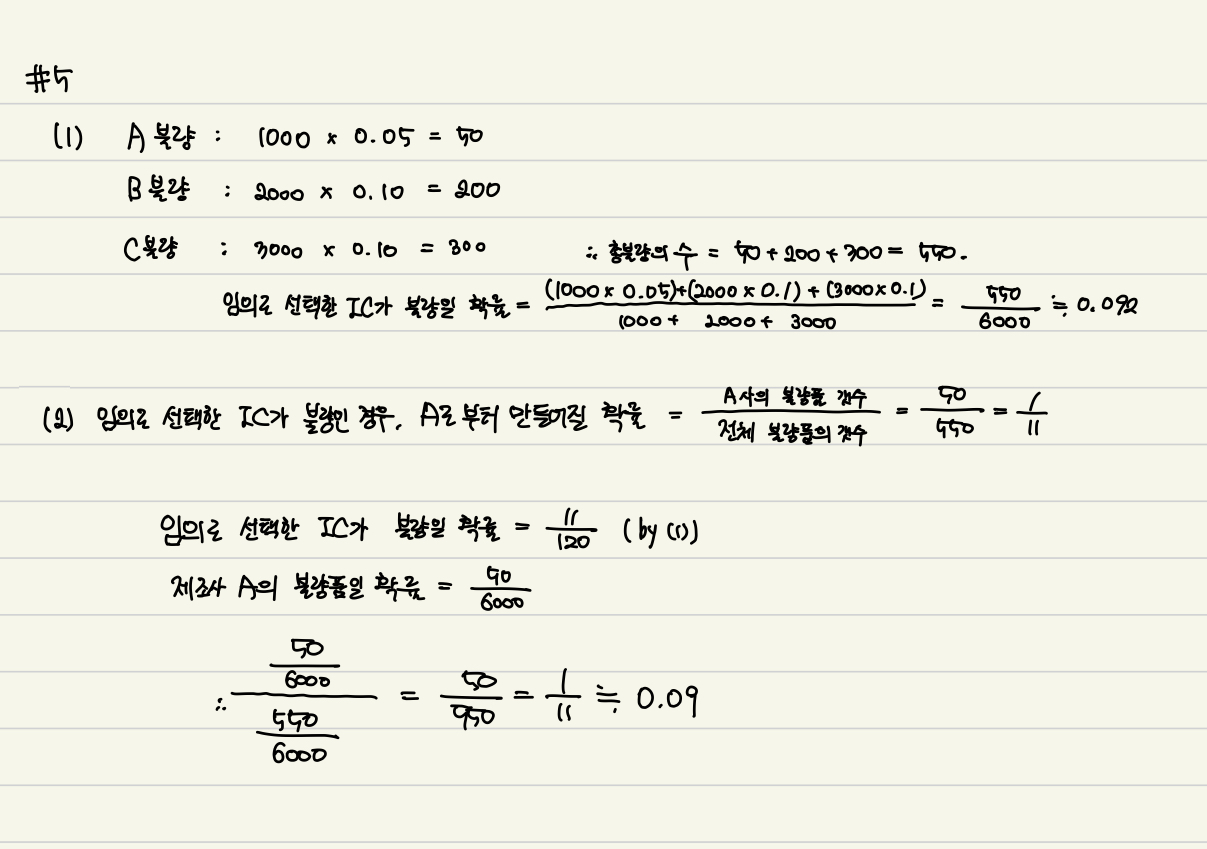

In [67]:
Image.open('Q5.jpeg')

### (1)	만약 3개의 제조사로부터 구매한 IC가 섞여 있는 경우, 임의로 선택한 IC가 불량일 확률은 얼 마인가?

In [68]:
((1000*0.05)+(2000*0.1)+(3000*0.1))/(1000+2000+3000)

0.09166666666666666

### (2)	임의로 선택한 IC가 불량인 경우, 그것이 제조사 A로부터 만들어질 확률은 얼마인가?


In [69]:
((1000*0.05)/6000)/(((1000*0.05)+(2000*0.1)+(3000*0.1))/(1000+2000+3000))

0.09090909090909091

## 6. [probability] K대학은 대학원생보다 2배의 학부생이 재학중이다. 대학원생의 25%가 기숙사에 살 고 있고, 학부생의 10%가 기숙사에 살고 있다. (4점)

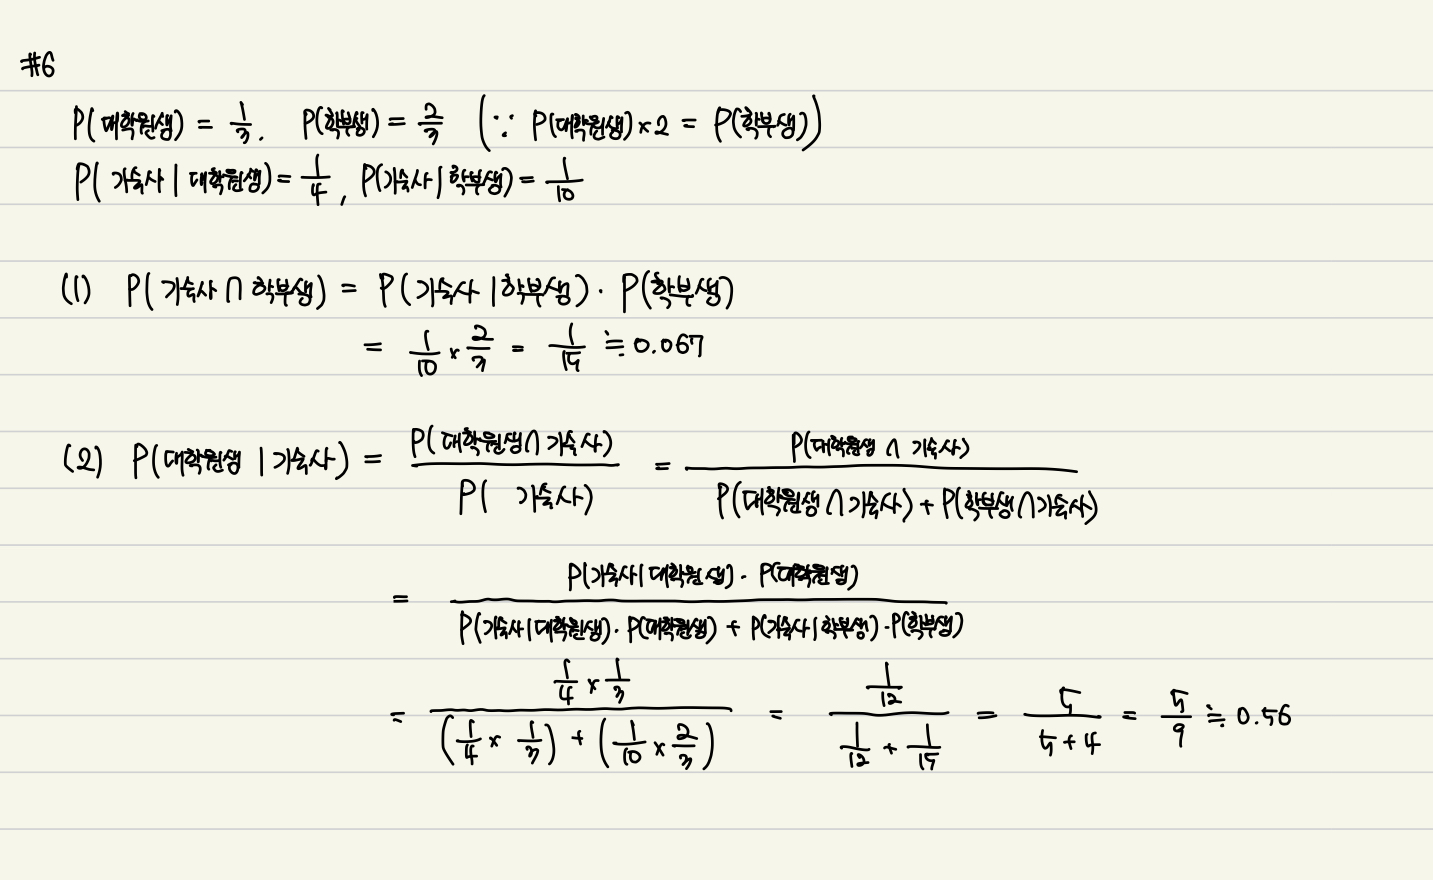

In [70]:
Image.open('Q6.jpeg')

### (1)	한 학생을 임의로 선정한 경우, 그 학생이 기숙사에 살고 있는 학부생일 확률은 얼마인가?

In [71]:
(1/10)*(2/3)

0.06666666666666667

### (2)	기숙사에 살고 있는 한 학생을 임의로 선정한 경우, 그 학생이 대학원생일 확률은 얼마인가?

In [72]:
((1/4)*(1/3))/((1/4)*(1/3)+(1/10)*(2/3))

0.5555555555555556

## 7. [probability] 다음의 확률 실험을 보고 물음에 답하세요. (4점)

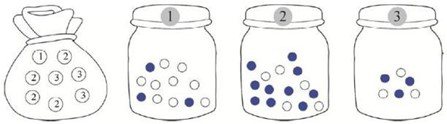

In [73]:
Image.open('문제7.jpg')

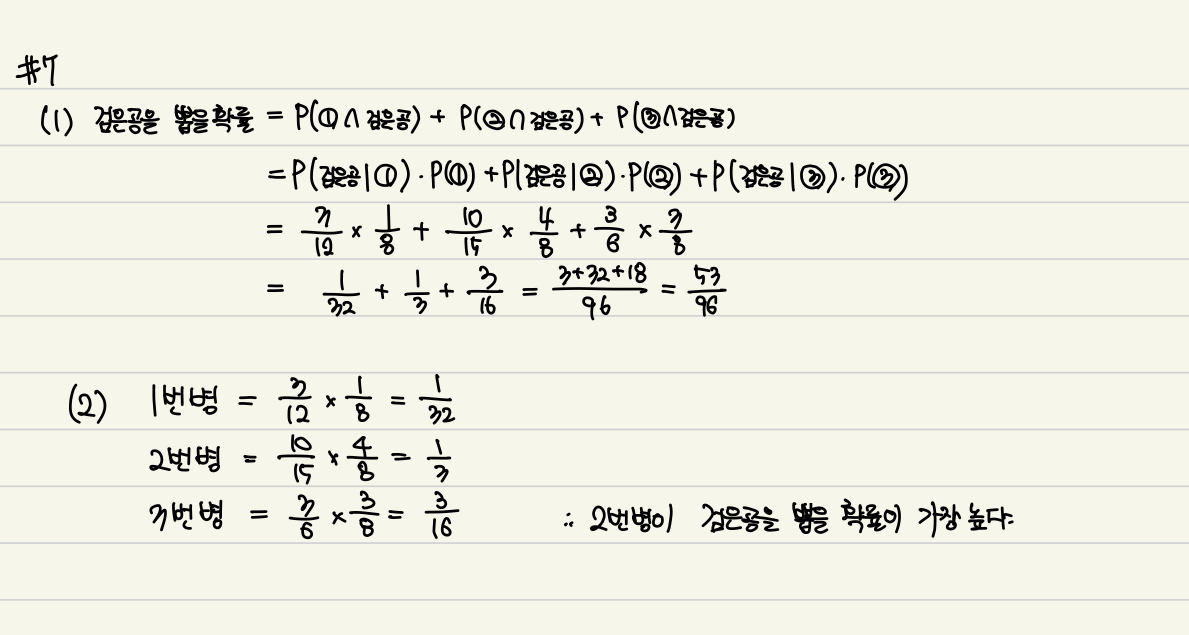

In [74]:
Image.open('Q7.jpeg')

### (1)	검은 공을 뽑을 확률을 구하세요.

In [75]:
(3/12)*(1/8)+(10/15)*(4/8)+(3/6)*(3/8)

0.5520833333333333

### (2)	검은 공을 뽑을 확률이 가장 높은 병을 구하세요.

In [76]:
max((3/12)*(1/8),(10/15)*(4/8),(3/6)*(3/8)) # 2번 병

0.3333333333333333

## 8.	[최적화] 다음 함수를 보고 각 문제에 답하세요. (15점)  
f(w1, w2) = w1^2 + w2^2 − 9  

### (1)	최소점과 최소값을 Newton method에 의해 분석적으로 구하세요. 

### (2)	난수를 생성하여, 초기값 𝐰0 = (1.0, 1.0)을 얻었다고 가정하고, 학습률 ρ=0.01인 경사  하강법  을 이용하여 갱신되는 𝐰1, 𝐰2, 𝐰3을 순차적으로 구하세요. (손으로 직접 풀 것)

### (3)	(2)의 경사 하강법이 (1)에서 구한 최소점을 향해 이동하는지 확인하세요.

### (4)	(2)의 과정을 Python을 활용하여 구하고, 비교하세요. (구현 코드 첨부)

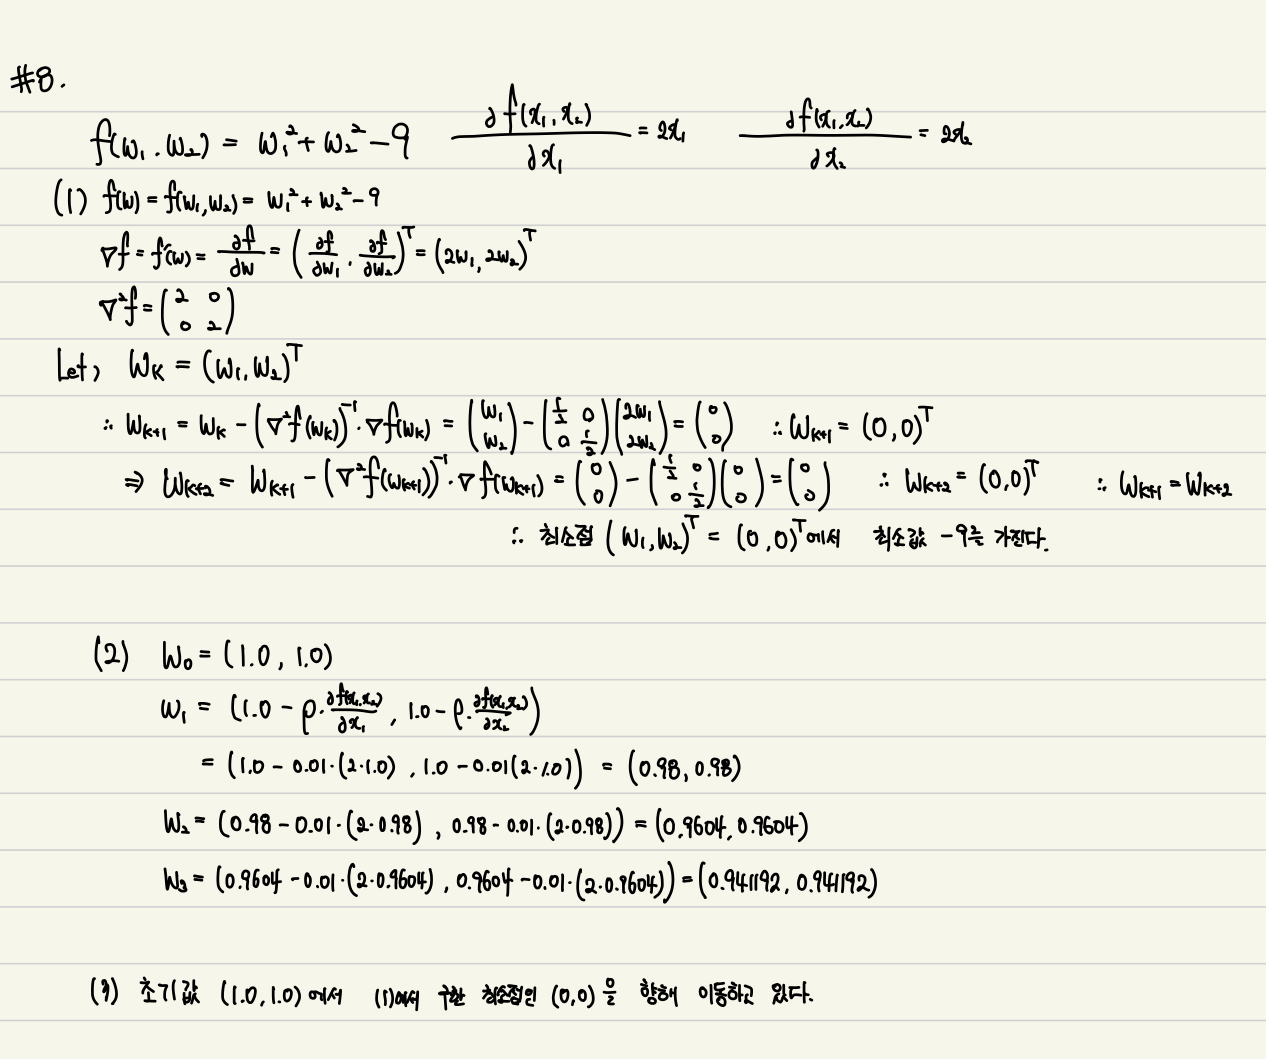

In [77]:
Image.open('Q8.jpeg')

In [78]:
import sympy as sp
w1,w2 = sp.symbols('w1 w2')
fw = (w1**2)+(w2**2)-9
fw1_prime = sp.diff(fw,w1)
fw2_prime = sp.diff(fw,w2)

In [79]:
fw1_prime, fw2_prime

(2*w1, 2*w2)

In [80]:
import torch

if torch.cuda.is_available(): # 현재 파이썬이 실행되고 있는 환경에서 torch 모듈을 이용할 때 GPU를 이용할 수 있는지 확인하는 함수
    DEVICE = torch.device('cuda') # 참이면 'cuda' 이용
else:
    DEVICE = torch.device('cpu') # 거짓이면 'cpu' 이용

x = torch.tensor([[1.0, 1.0]], requires_grad=False)

import sympy as sp
w1,w2 = sp.symbols('w1 w2')
fw = (w1**2)+(w2**2)-9
fw1_prime = sp.diff(fw,w1)
fw2_prime = sp.diff(fw,w2)

# 학습 정도를 결정하는 learning_rate 설정
learning_rate = 0.01
# df/dw1 = 2*w1, df/dw2 = 2*w2

for t in range(3): # w2, w3, w4 계산
    x -= learning_rate * (2*x)  # f'(w) = (fw1_prime, fw2_prime) = (2*w1, 2*w2)이므로 미분값을 2*x로 지정해서 대입
    print(f'w{t+2} = {x}')

w2 = tensor([[0.9800, 0.9800]])
w3 = tensor([[0.9604, 0.9604]])
w4 = tensor([[0.9412, 0.9412]])


## 9.[퍼셉트론] 다음 그림의 퍼셉트론 (perceptron) 입니다. (10점)

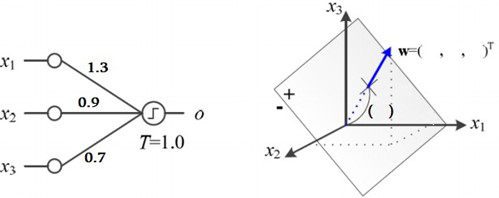

In [81]:
Image.open('문제9.jpg')

### (1)	해당 퍼셉트론에 의해 결정되는 결정평면의 방향과 원점에서의 거리를 구하세요.

In [82]:
1/np.sqrt((1.3*1.3)+(0.9*0.9)+(0.7*0.7))

0.5783149319662402

###  (2)	T=2.0, T=0.0으로 바꾸기 위해 퍼셉트론을 수정하고, 결정평면의 변화를 설명하세요.

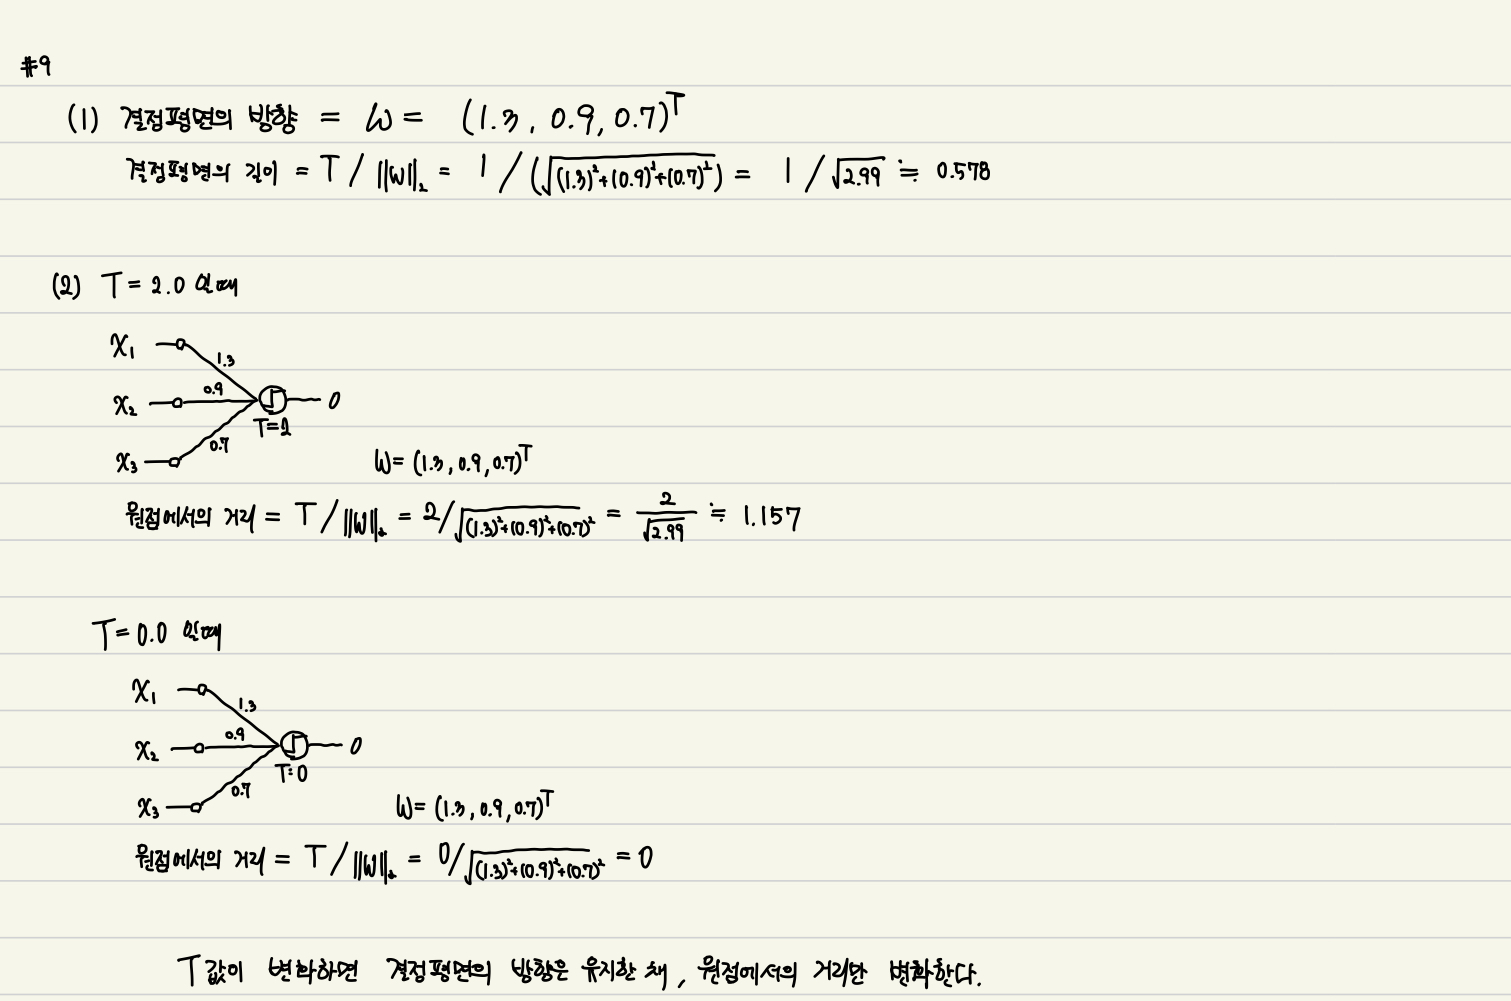

In [83]:
Image.open('Q9.jpeg')

## 10.[PLA] PLA 가중치 갱신 법칙 𝑤(𝑡 + 1) = 𝑤(𝑡) + 𝑦(𝑡)𝑥(𝑡) 를 보고 다음 문제의 답을 보이세요. (20점)

### (1) 𝑦(𝑡)𝑤𝑇(𝑡)𝑥(𝑡) < 0임을 보이세요. (Hint: 𝑥(𝑡)는 𝑤(𝑡)에 의해 오분류 됨)

### (2) 𝑦(𝑡)𝑤𝑇(𝑡 + 1)𝑥(𝑡) > 𝑦(𝑡)𝑤𝑇(𝑡) 𝑥(𝑡) 임을 보이세요. (Hint: 𝑤(𝑡 + 1) = 𝑤(𝑡) + 𝑦(𝑡)𝑥(𝑡) 이용)

### (3)	𝑤(𝑡)에서 𝑤(𝑡 + 1)로 이동하는 것이 𝑥(𝑡)를 분류하는데 올바른 방향으로 이동함을 설명하세요.

### (4) 𝐰 = [w0, w1, w2]T이고, 𝐱 = [1, x1, x2]T 인 ℎ(𝑥) = sign(𝐰T𝐱) 일 때, ℎ(𝐱) = −1와  ℎ(𝐱) = 1는 결정 직선 x2 = ax1 + 𝑏 에 의해 구분된다. 결정 직선의 기울기 a와 절편 b를 가중치 w0, w1, w2 에 의해 설명하세요.

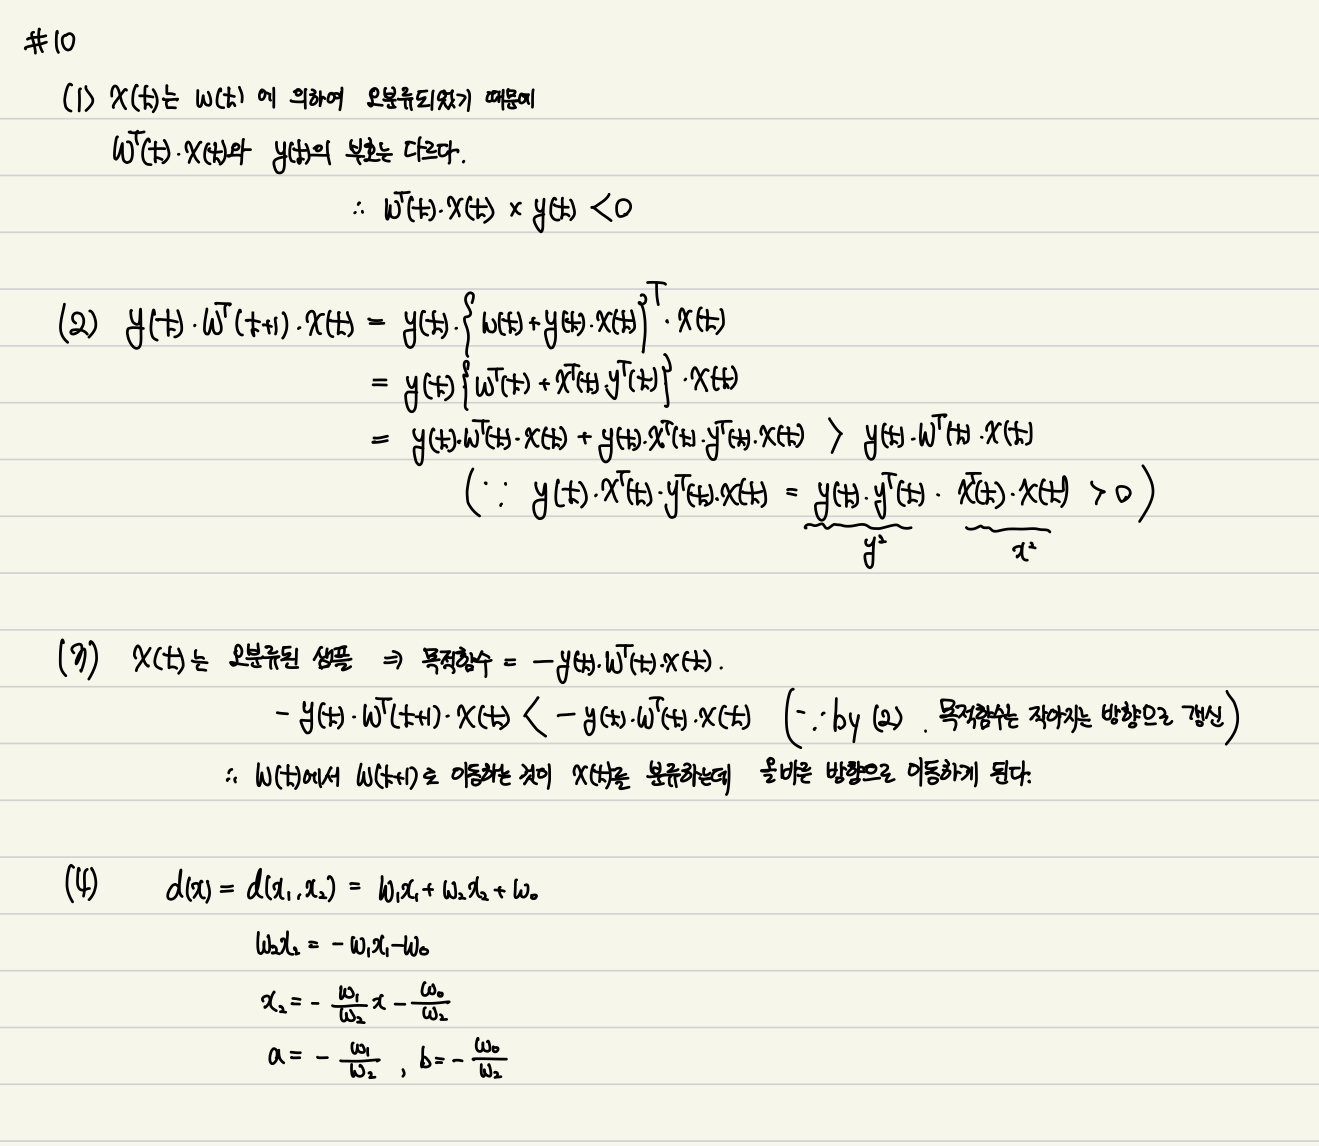

In [84]:
Image.open('Q10.jpeg')